# Module 7: Pandas II

Course: Advanced Programming for CSAI (Spring 2024)

This is the second notebook of this module. It assumes that you have familiarized yourself with the notebook on Introduction to Pandas.

Topics covered in this module:  
- Reading and Exploring Data.
- Data Cleaning.
- Filter, Sort and GroupBy.
- Joining and Merging

You can always refer to the docs: https://pandas.pydata.org/docs/index.html

You are advised to work on this notebook after, or in parallel to, consulting other materials of the module, such as the slide deck and book chapters. The notebook contains examples and exercises that should help you understand and apply the concepts introduced in the rest of materials. You may also use the official Python docs: https://docs.python.org/3/.

Do not hesitate to be creative when trying out the examples: you can play with the code. You can try variants of the examples and exercises, print values of the variables to understand what is going on at every step, and come up with different solutions to the same exercise and think about relative advantages of each one.

The notebook also contains formative assignments. These are indicated as FA-n, where n is a number id. As explained on the course guide, you have to submit these. Please submit your best effort (*i.e.*, FA-n questions with no answer will be considered incomplete), and **if your solution does not work or you think it is inadequate, add a comment explaining why you could not proceed further**.

To submit the formative assignments, we ask you to upload the filled-in notebook. The notebook you upload should contain *at least* the formative assigments. It's not a problem if you upload the notebook with additional code, like the variants and tests mentioned above. However, to grade your assignments, we will only look at the answers to the requested exercises (those indicated with FA-n), so **make sure you store your answers in the corresponding variables and/or to name your functions as indicated**.

Optional exercises are, as the name indicates, not mandatory for the formative assignments. These are exercises that suggest you to create an alternative approach, or which propose a longer problem that allows for the integration of earlier concepts in one solution; in general, they present scenarios where you can be more creative. To make the most of the course, it is best to try them out and share your solutions on the Discussion Board, so that your peers can comment on them. You are also encouraged to comment on the exercises of your fellow students. This will help you sharpen your evaluation skills, which is a great asset in programming, as in turn this will help you devise more robust, efficient and maintainable solutions. 


### /!\ Before submitting your notebook

Please check it can be ran without errors! You can check this by pressing kernel --> restart and run all before submitting. If it does not run without errors, it is your **responsibility** to fix the problem either by resolving the bug in your code or by commenting it out along with a comment.


---

## 0. Quick Recap 
Pandas is an open source data analysis library for providing easy-to-use data structures and data analysis tools.

__DATA STRUCTURES__

**DataFrame** is a mXn vector where
* m is the number of rows
* n is the number of columns

**Series** is a mX1 vector. Each column in DataFrame is Pandas Series.

* Ceating dataframes/series
    * __pd.DataFrame(dict)__ - from a dict, keys for columns names, values for data as lists
    * __pd.DataFrame(np.random.rand(20,5))__ - 20 rows and 5 columns of random floats
    * __pd.Series(my_list)__ - creates a series from an iterable my_list
    * etc...
* Read from file
    * __pd.read_csv(filename)__ - from a csv file
    * __pd.read_table(filename)__ - from a delimited text file (like TSV)
    * __pd.read_excel(filename)__ - from an Excel file 
* Indexing/selecting
    * __df[col]__ or __df.col__- returns column with label col as Series
    * __df[[col1, col2]]__ - returns Columns as a new DataFrame
    * __s.iloc[0]__ - selection by position (integer position based)
    * __s.loc[0]__ - selection by index (label based)
    * __df.loc[:, :]__ and __df.iloc[:, :]__ - First argument represents the number of rows and the second for columns
    * etc...
    
* Viewing
    * __df.head(n)__ - first n rows of the DataFrame [__replace head with tail__, you know what you will get]
    * __df.shape__ - number of rows and columns 
    * __df.info()__ - index, datatype and memory 
    * __df.describe()__ - summary statistics for numerical columns
    * etc...
* Renaming
    * __df.columns = ['a','b','c']__ - Renames columns


In [1]:
import pandas as pd

## 1. Read/Explore Data

Before you start cleaning a data set, it’s a good idea to just get a general feel for the data. After that, you can put together a plan to clean the data.

We can start by asking the following questions:

    What are the features?
    What are the expected types (int, float, string, boolean)?
    Are there obvious missing data (values that Pandas can detect)?
    Are there other types of missing data that are not so obvious (can’t easily detect with Pandas)?

Let’s start working through the example. The data we’re going to work with is a sample of data scraped from the Google Playstore. You can find it on the canvas page - make sure you save it in the same folder as the notebook (or if not, that you provide the correct path)

Let's get a first impression of our data. We already know some functions that will be helpful for this (see notebook: Intro to Pandas).

### FA-1.

- ***Part A.*** Read in the googleplaystore_sample.csv file.
- ***Part B.***  Explore the shape of the data.
- ***Part C.***  Verify information about the DataFrame including the index, dtype and columns, non-null values and memory usage.
- ***Part D.***  Print the first 10 rows.
- ***Part E.***  Do you notice anything with respect to missing data?
- ***Part F.***  And regarding the data types?

In [2]:
df=pd.read_csv('googleplaystore_sample.csv')
df
# df[df["Size"].str.contains("k")]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,3741,Asahi Shimbun Digital,NEWS_AND_MAGAZINES,3.1,735,6.3M,"500,000+",Free,0,Everyone,News & Magazines,"July 25, 2018",6.3.0,4.0.3 and up
1,10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
2,51,Ultimate F1 Racing Championship,AUTO_AND_VEHICLES,3.8,284,57M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 26, 2018",3.0,4.1 and up
3,490,CMB Free Dating App,DATING,4.0,48845,40M,"1,000,000+",Free,0,Mature 17+,Dating,"August 1, 2018",4.19.0.2320,4.4 and up
4,8991,DW Spectrum™ IP VMS,BUSINESS,3.4,102,2.4M,"10,000+",Free,0,Everyone,Business,"April 14, 2016",2.5.0-prod,2.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4392,Shop 'n Save,SHOPPING,3.4,620,40M,"100,000+",Free,0,Everyone,Shopping,"March 13, 2018",2.2.8,4.1 and up
9996,9356,Dance Magic Fashion Style Games,FAMILY,4.6,2533,46M,"100,000+",Free,0,Everyone,Simulation,"February 27, 2018",1.0,4.0 and up
9997,6885,Smashy Road: Arena,GAME,4.3,45558,53M,"5,000,000+",Free,0,Everyone 10+,Action,"May 24, 2018",1.1.9,4.1 and up
9998,5485,AP Math & Computer Science,FAMILY,3.7,37,9.5M,"5,000+",Free,0,Everyone,Education,"July 19, 2015",2.16,2.3 and up


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1   App             10000 non-null  object 
 2   Category        10000 non-null  object 
 3   Rating          8649 non-null   float64
 4   Reviews         10000 non-null  object 
 5   Size            10000 non-null  object 
 6   Installs        10000 non-null  object 
 7   Type            10000 non-null  object 
 8   Price           10000 non-null  object 
 9   Content Rating  9999 non-null   object 
 10  Genres          10000 non-null  object 
 11  Last Updated    10000 non-null  object 
 12  Current Ver     9993 non-null   object 
 13  Android Ver     9997 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.head(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,3741,Asahi Shimbun Digital,NEWS_AND_MAGAZINES,3.1,735,6.3M,"500,000+",Free,0,Everyone,News & Magazines,"July 25, 2018",6.3.0,4.0.3 and up
1,10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
2,51,Ultimate F1 Racing Championship,AUTO_AND_VEHICLES,3.8,284,57M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 26, 2018",3.0,4.1 and up
3,490,CMB Free Dating App,DATING,4.0,48845,40M,"1,000,000+",Free,0,Mature 17+,Dating,"August 1, 2018",4.19.0.2320,4.4 and up
4,8991,DW Spectrum™ IP VMS,BUSINESS,3.4,102,2.4M,"10,000+",Free,0,Everyone,Business,"April 14, 2016",2.5.0-prod,2.2 and up
5,751,CppDroid - C/C++ IDE,EDUCATION,4.1,29980,Varies with device,"1,000,000+",Free,0,Everyone,Education,"August 17, 2017",Varies with device,Varies with device
6,4228,I Screen Dialer,TOOLS,4.1,8137,3.9M,"1,000,000+",Free,0,Everyone,Tools,"February 25, 2018",1.11,4.3 and up
7,10310,Deposit Calculator FD & RD,FINANCE,4.4,18,3.4M,"10,000+",Free,0,Everyone,Finance,"January 21, 2017",1.1,3.0 and up
8,9712,EP Research Service,BOOKS_AND_REFERENCE,4.7,14,27M,"1,000+",Free,0,Everyone,Books & Reference,"March 5, 2018",1.9,4.1 and up
9,4954,Adblock Plus for Samsung Internet - Browse safe.,COMMUNICATION,4.0,8769,2.1M,"1,000,000+",Free,0,Everyone,Communication,"April 5, 2018",1.1.4,5.0 and up


In [7]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1351
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          7
Android Ver          3
dtype: int64

In [8]:
##### FA-1 A ##############################
# df=pd.read_csv('googleplaystore_sample.csv')
# df
###########################################

##### FA-1 B ##############################
# df.shape()
# (10000, 14) 10 000 rows and 14 columns
###########################################

##### FA-1 C ##############################
# df.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 10000 entries, 0 to 9999
# Data columns (total 14 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   Unnamed: 0      10000 non-null  int64  
#  1   App             10000 non-null  object 
#  2   Category        10000 non-null  object 
#  3   Rating          8649 non-null   float64
#  4   Reviews         10000 non-null  object 
#  5   Size            10000 non-null  object 
#  6   Installs        10000 non-null  object 
#  7   Type            10000 non-null  object 
#  8   Price           10000 non-null  object 
#  9   Content Rating  9999 non-null   object 
#  10  Genres          10000 non-null  object 
#  11  Last Updated    10000 non-null  object 
#  12  Current Ver     9993 non-null   object 
#  13  Android Ver     9997 non-null   object 
# dtypes: float64(1), int64(1), object(12)
# memory usage: 1.1+ MB
###########################################

##### FA-1 D ##############################
# df.head(10)

###########################################

##### FA-1 E ##############################
# on columns with index 3,9,12, and 13 contain NA values 
# df.info()
# 3   Rating          8649 non-null   float64
# 9   Content Rating  9999 non-null   object 
# 12  Current Ver     9993 non-null   object 
# 13  Android Ver     9997 non-null   object 

# therefore, df.isnull().sum() we can see how many NA values are per column
# Rating            1351
# Content Rating       1
# Current Ver          7
# Android Ver          3
###########################################

##### FA-1 F ##############################
# df.dtypes shows the differnet types and out of all columns, only these two are not object type
# Unnamed: 0          int64
# Rating            float64
###########################################

## 2. Data Cleaning

Data cleaning can be a tedious task. When you start a new project and you might want to immediately run some machine learning/deep learning models. Having a closer look at the data, might make your realize fairly quickly that it is often a mess. According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data.

<div>
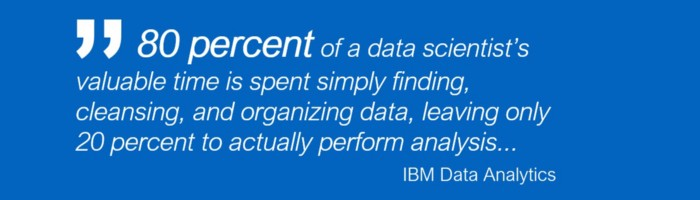
</div>


We will walk through a number of different data cleaning tasks using Pandas with a specific focus on one of the biggest data cleaning task: missing values.

Before we dive into code, it’s important to understand the data. Here’s some typical reasons why data is missing:

    - User forgot to fill in a field, or decided not to.
    - Data was lost while transferring manually from a legacy database.
    - There was a programming error.

### Useful functions for data cleaning
* __df.drop([col1, col2, col3], inplace = True, axis=1)__ - Remove set of column(s)
* __df.isnull()__ - Checks for null Values, Returns Boolean DataFrame
* __df.isnull().any()__ - Returns boolean value for each column, gives True if any null value detected corresponding to that column
* __df.isnull().sum()__ - Returns number of missing values for each column
* __df.dropna()__ - Drops all rows that contain null values
* __df.dropna(axis=1)__ - Drops all columns that contain null values
* __df.fillna(x)__ - Replaces all null values with x
* __s.replace(1,'one')__ - Replaces all values equal to 1 with 'one'
* __s.replace([1,3], ['one','three'])__ - Replaces all 1 with 'one' and 3 with 'three'
* __df.rename(columns = lambda x: x + '_1')__ - Mass renaming of columns
* __df.rename(columns = {'old_name': 'new_name'})__ - Selective renaming
* __df.rename(index = lambda x: x + 1)__ - Mass renaming of index
* __df[new_col] = df.col1 + ', ' + df.col2__ - Add two columns to create a new column in the same DataFrame


In [9]:
# df["New column"] = df['Unnamed: 0']  + df['Rating'] 

In [10]:
# df.drop([col1, col2, col3], inplace = True, axis=1)  inplace makes sure that these cols are permanently dropped out of the original dataset
# df['Age'].fillna(df['Age'].mean()) #in a specific col called Age if there is a NA replace it with the mean value of that spec column
# df.fillna(df['Age'].mean()) #this will replace all the NA in the whole df with the mean of Age

In [11]:
# df.rename(columns = lambda x: x + '1') add 1 at the end of all column names

In [12]:
# df.rename(columns = {'Unnamed: 0': 'ID'}) 

In [13]:
# df["Category"] = df["Category"].replace(['NEWS_AND_MAGAZINES','News & Magazines'], ['one','three'])
# df["Genres"] = df["Genres"].replace(['NEWS_AND_MAGAZINES','News & Magazines'], ['one','three'])

In [14]:
# df.replace('0','1') it will change 0 with in in the whole df in all columns
# df['Rating'].replace(3.1,3.2) here it will replace the values in rating column only

In [15]:
# df["Rating"] = df['Rating'].replace(3.1,3.2) #storing into a variable makes the new values to be in the original dataset constantly

### 2.1 Datatypes

<div>
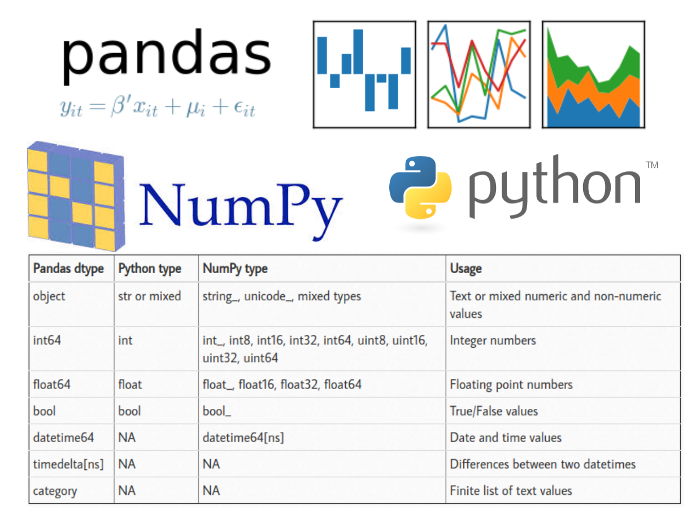
</div>


When printing the datatype using the info() function, we noticed already that many columns were of the 'object' dtype while for some a different, more explicit datatype (e.g. Reviews column contains contains data with dtype object while they are integers).

There are two standard ways of converting pandas data types:

    - <column>.astype(<desired type>)
    
    - conversion helper functions, like pd.to_numeric or pd.to_datetime
    
```astype``` is quick and works well with clean data and when the conversion is straightforward (e.g. from int64 to float64 or vice versa). ```astype``` can be called directly on the column that you want to convert.

The main adventage of using conversion helper functions like ```pd.to_numeric``` or ```pd.to_datetime``` over ```astype``` is that it is possibly to specify the behavior in case a value is encountered that cannot be converted. Both functions accept an additional parameter ```errors``` that defines how errors should be treated. We could choose to ignore errors by passing ```errors = 'ignore'```, or turn the offending values into ```np.nan``` values by passing ```errors = 'coerce'```. The default behavior is to raise errors.

Best is to investigate before making a decision. The fewer offending values compared to the number of observations you have, the more likely it is that you can coerce them.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1   App             10000 non-null  object 
 2   Category        10000 non-null  object 
 3   Rating          8649 non-null   float64
 4   Reviews         10000 non-null  object 
 5   Size            10000 non-null  object 
 6   Installs        10000 non-null  object 
 7   Type            10000 non-null  object 
 8   Price           10000 non-null  object 
 9   Content Rating  9999 non-null   object 
 10  Genres          10000 non-null  object 
 11  Last Updated    10000 non-null  object 
 12  Current Ver     9993 non-null   object 
 13  Android Ver     9997 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


#### Example: Change the dype of the 'Installs' column

Let's have a look at the ```Installs``` column, which has the ```object dtype``` - but from the data exploration, we saw it contains ```numeric``` data. We can look into it in more details by checking the values of the column.

In [17]:
df['Installs'].head(5)

0      500,000+
1          100+
2      100,000+
3    1,000,000+
4       10,000+
Name: Installs, dtype: object

To convert it into numeric data, we would need to remove the `+` character from the end: 

In [18]:
df['Installs_cleaned']=df['Installs'].apply(lambda x:x.rstrip('+')) #this will remove the + from the end of the str only and if there are more than 1
                                                                    # + signs at the end of the str, all of them will be removed
                                                                    #hello+++ -> hello
                                                                    #hello+ +++->hello+ (the space after the 1st + is kept not removed
df['Installs_cleaned'].head(5)

#if i want to into the string and replace a specific item there i need to use apply lambda and them rstrip for replacing by the end and replace 
#to replace an item anywhere in the string
#but this syntax must be used apply(lambda x:x.replace(',','')) or apply(lambda x:x.rstrip(',',''))
#df.replace is different thing cuz it replace the whole string with another not going inside the string searching for an element to replace

0      500,000
1          100
2      100,000
3    1,000,000
4       10,000
Name: Installs_cleaned, dtype: object

Then, we can see that every number has `,` in between. We need to remove that inorder to make it numerical. We do that by using the `replace` method:

In [19]:
df['Installs_cleaned'] = df['Installs_cleaned'].apply(lambda x:x.replace(',',''))
df['Installs_cleaned'].head(5)

0     500000
1        100
2     100000
3    1000000
4      10000
Name: Installs_cleaned, dtype: object

Finally, we can change the data type to integer using pandas built in `to_numeric` method.

In [20]:
# df['Installs_cleaned'] = pd.to_numeric(df['Installs_cleaned'])


# shows:
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# File lib.pyx:2391, in pandas._libs.lib.maybe_convert_numeric()

# ValueError: Unable to parse string "Free"

# During handling of the above exception, another exception occurred:

# ValueError                                Traceback (most recent call last)
# Cell In[56], line 1
# ----> 1 df['Installs_cleaned'] = pd.to_numeric(df['Installs_cleaned'])

# File C:\python3\lib\site-packages\pandas\core\tools\numeric.py:232, in to_numeric(arg, errors, downcast, dtype_backend)
#     230 coerce_numeric = errors not in ("ignore", "raise")
#     231 try:
# --> 232     values, new_mask = lib.maybe_convert_numeric(  # type: ignore[call-overload]
#     233         values,
#     234         set(),
#     235         coerce_numeric=coerce_numeric,
#     236         convert_to_masked_nullable=dtype_backend is not lib.no_default
#     237         or isinstance(values_dtype, StringDtype)
#     238         and not values_dtype.storage == "pyarrow_numpy",
#     239     )
#     240 except (ValueError, TypeError):
#     241     if errors == "raise":

# File lib.pyx:2433, in pandas._libs.lib.maybe_convert_numeric()

# ValueError: Unable to parse string "Free" at position 6648

Apparently, we still missed something. There is a cell with the data 'Free', which is most likely an error. We can either drop the rows containing ```Free```, replace it by NaN or 0, or impute it with e.g. the mean/median of the values of that column. We'll look into how to impute with the mean/median in the next section (*Handling Missing Values*).

For now, let's replace the ```Free``` value(s) by NaN. 


Using the ```replace()``` function:

In [21]:
import numpy as np                                       #['Free'] works the same as 'Free'
df['Installs_cleaned'] = df['Installs_cleaned'].replace(['Free'],np.nan) #replace the whole 'Free' str with NA; np.nan is the right way to say NA
df['Installs_cleaned'] = pd.to_numeric(df['Installs_cleaned'])
df['Installs_cleaned'].head()

#alternative of this whole code above- > df['Installs_cleaned'] = pd.to_numeric(df['Installs_cleaned'], errors = 'coerce')

0     500000.0
1        100.0
2     100000.0
3    1000000.0
4      10000.0
Name: Installs_cleaned, dtype: float64

We could have also changed the default error parameter of the ```to_numeric``` function to `coerce`: 

```df['Installs_cleaned'] = pd.to_numeric(df['Installs_cleaned'], errors = 'coerce')```

which will set invalid parsings as NaN automatically. This is quite handy but could also possibly remove useful information without you knowing so.

When we now print the info, we see that there is an additional column, ```Installs_cleaned``` that is no longer of dtype ```object``` but a ```float64```.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   App               10000 non-null  object 
 2   Category          10000 non-null  object 
 3   Rating            8649 non-null   float64
 4   Reviews           10000 non-null  object 
 5   Size              10000 non-null  object 
 6   Installs          10000 non-null  object 
 7   Type              10000 non-null  object 
 8   Price             10000 non-null  object 
 9   Content Rating    9999 non-null   object 
 10  Genres            10000 non-null  object 
 11  Last Updated      10000 non-null  object 
 12  Current Ver       9993 non-null   object 
 13  Android Ver       9997 non-null   object 
 14  Installs_cleaned  9999 non-null   float64
dtypes: float64(2), int64(1), object(12)
memory usage: 1.1+ MB


### FA-2

***Part A.*** Convert the data type of the Size column from object to floats.

When using ```astype``` or ```to_numeric``` without coercing the errors, we get a ValueError. Verify that this is the case: 

In [23]:
##### FA-2 A ##############################
# df['Size']=pd.to_numeric(df['Size'])

# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# File lib.pyx:2391, in pandas._libs.lib.maybe_convert_numeric()

# ValueError: Unable to parse string "6.3M"

# During handling of the above exception, another exception occurred:

# ValueError                                Traceback (most recent call last)
# Cell In[62], line 2
#       1 ##### FA-2 A ##############################
# ----> 2 df['Size']=pd.to_numeric(df['Size'])
#       3 ###########################################

# File C:\python3\lib\site-packages\pandas\core\tools\numeric.py:232, in to_numeric(arg, errors, downcast, dtype_backend)
#     230 coerce_numeric = errors not in ("ignore", "raise")
#     231 try:
# --> 232     values, new_mask = lib.maybe_convert_numeric(  # type: ignore[call-overload]
#     233         values,
#     234         set(),
#     235         coerce_numeric=coerce_numeric,
#     236         convert_to_masked_nullable=dtype_backend is not lib.no_default
#     237         or isinstance(values_dtype, StringDtype)
#     238         and not values_dtype.storage == "pyarrow_numpy",
#     239     )
#     240 except (ValueError, TypeError):
#     241     if errors == "raise":

# File lib.pyx:2433, in pandas._libs.lib.maybe_convert_numeric()

# ValueError: Unable to parse string "6.3M" at position 0
###########################################

***Part B.*** Now, we could simply remove the ```M``` at the end like we did with the ```+``` sign for the ```Installs``` columns. However, there are sometimes also ```k``` after the numeric data. Given that you know that the ```M``` in the size column stand for megabytes and the ```k``` stands for kilobytes, it wouldn't make much sense to simply remove the ```M```'s and ```k```'s from this information. 
For example:
- 10M: We could remove the ```M``` and keep the numeric value.
- 512k: We could convert the size, which depicts app size in kilobytes by removing the first k and converting the size to an equivalent of megabytes.

*Info*:
1 megabyte = 1024 kilobytes

How would/could you pre-process the data in such a way that this information is preserved?

In [24]:
##### FA-2 B ##############################
def convert(x):
    if "M" in x:
        return x.replace('M','')
    elif "k" in x:
        x = x.replace('k','')
        return float(x)/1024
    else:
        return x

df['Size_cleaned'] = df['Size'].apply(convert)
###########################################

***Part C.*** Now that we've removed the `M` info and converted all kilobytes to size, convert the `Size_cleaned` column to numeric. If there are still errors, convert those values into NaN.

In [25]:
##### FA-2 C ##############################
df['Size_cleaned']=pd.to_numeric(df['Size_cleaned'], errors = "coerce")
###########################################

***Part D.*** Verify whether indeed the ```Size_cleaned``` column has a numeric dtype now. Also count how many invalid parsings were set to ```NaN```. You can do this using the ```isnull()``` function. 

In [26]:
##### FA-2 D ##############################
print(df["Size_cleaned"].dtypes)
print(df["Size_cleaned"].isnull().sum())
###########################################

float64
1549


We seem to have created quite some NaN values for the size_cleaned column. Let's look at how we can deal with missing values in the next section.

### 2.2 Handling Missing Values
<div>
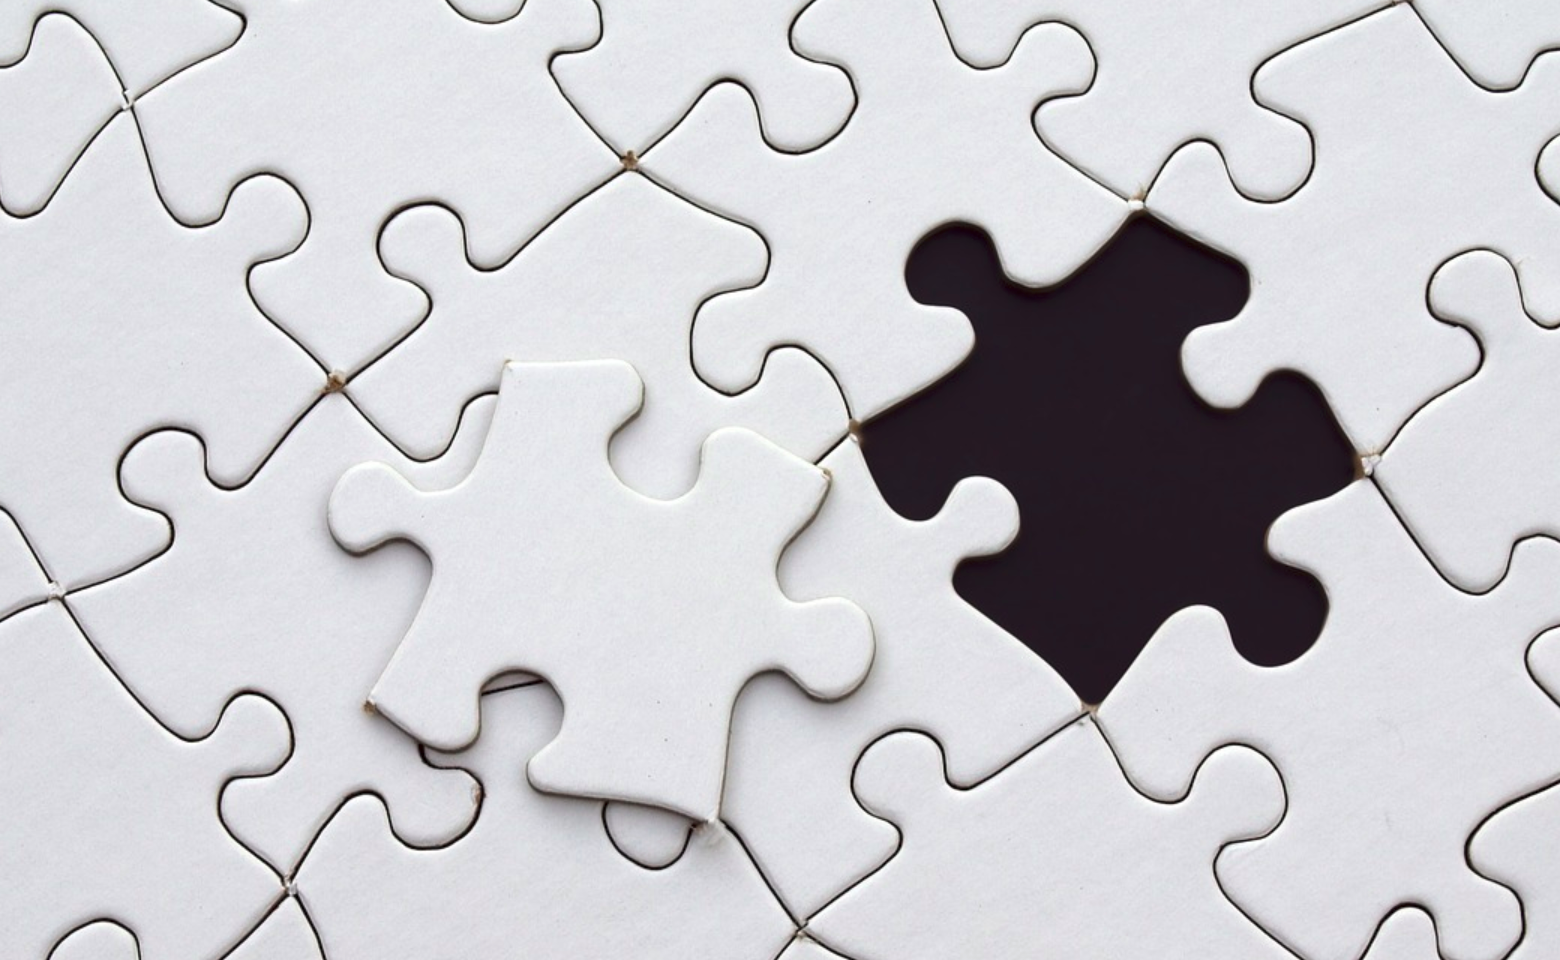
</div>


We have converted some of the datatypes and created a cleaned version of them (```Installs_cleaned``` and ```Size_cleaned```). These columns however, still contain missing values - part of them due to us changing the datatype. For instance, the ```Size``` column contained strings ```Varies with device```, which we have converted into NaN values since we changed the datatype to numeric and coerced the errors.

Let's replace those NaNs by the median of that column using the ```fillna()``` and ```median()``` functions.

In [27]:
import warnings
warnings.filterwarnings('ignore')
#there are 1549 NA values -> they r replaced with the median value of the column so there are 0 NA after that
df["Size_cleaned"].fillna(df.Size_cleaned.median(),inplace = True)
# df["Size_cleaned"] = df["Size_cleaned"].fillna(df.Size_cleaned.median()) this is the same as the line above - saving the changes to the original Size_cleaned df

Using the ```inplace=True``` keyword in a pandas method changes the default behaviour such that the operation on the dataframe doesn't return anything, it instead 'modifies the underlying data'. It mutates the actual object which you apply it to. You can verify that by looking at the missing values in the ```size_cleaned``` column, which should, after executing the previous line of code, be ```0```.

In [28]:
print('Missing values in Size_cleaned column')
df["Size_cleaned"].isnull().sum()

Missing values in Size_cleaned column


0

### FA-3
***Part A.*** Verify how many missing values there are in the ```Rating``` column. 

In [29]:
##### FA-3 A ##############################
df["Rating"].isnull().sum()
###########################################

1351

***Part B.*** Replace the missing values with the ```mean``` value for that column and verify whether indeed the missing values are gone.

In [30]:
##### FA-3 B ##############################
df["Rating"].fillna(df.Rating.mean(),inplace = True)
df["Rating"].isnull().sum()
###########################################

0

***Part C*** Save a copy of your processed dataset to csv without writing the row names (index). Check the documentation of the ```to_csv()``` function and figure out how to do that. 

In [31]:
##### FA-3 C ##############################
df.to_csv('copy_of_the_df.csv', index=False)
###########################################

## 3. Filter, Sort, Group by & Aggregating

### Useful functions


* __df.apply(np.mean)__ - Applies a function across each column
* __df.apply(np.max, axis=1)__ - Applies a function across each row
* __df.applymap(lambda arg(s): expression)__ - Apply the expression on each value of the DataFrame
* __df[col].map(lambda arg(s): expression)__ - Apply the expression on each value of the column col

In [32]:
# df.apply(np.mean) this will calc the mean of each col and will replace each cell in each col in the table with the given mean val

#according to:df.applymap(lambda arg(s): expression) - Apply the expression on each value of the DataFrame
# df.applymap(lambda x: x * 2) it will apply the expression on all the columns no matter if it is a str or int only if it is a multiplication
#if it is division - on str it does not work;
#on the left we have only only letter 'x' which repr each cell in the table so there cannot be more than one letter like x,y,z so arg(s) is only arg here

#according to df[col].map(lambda arg(s): expression) 
# df['Size'].map(lambda x: expression) - x is all the cells in the specific colimn Size 

### 3.1 Filter

To subset/filter the rows of your data, there are a few different ways to do so:
* __df[df[col] > 0.5]__ - Rows where the values in col > 0.5
* __df[(df[col] > 0.5) & (df[col] < 0.7)]__ - Rows where 0.7 > col > 0.5
*  the query method
*  the loc method
*  the iloc method

Let's further look into filtering the data using an example:

We've pre-processed our ```Rating``` column. We now want to start interpreting our ```Rating``` data a bit better by looking at the maximum, mininum value in the Rating colum. But also by printing the ```value_counts``` which will give you the counts for each unique value.

In [33]:
df[df["Rating"] > 3].head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_cleaned,Size_cleaned
0,3741,Asahi Shimbun Digital,NEWS_AND_MAGAZINES,3.100000,735,6.3M,"500,000+",Free,0,Everyone,News & Magazines,"July 25, 2018",6.3.0,4.0.3 and up,500000.0,6.3
1,10823,List iptv FR,VIDEO_PLAYERS,4.192785,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up,100.0,2.9


In [34]:
df.query("Rating > 3").head(2) # with query

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_cleaned,Size_cleaned
0,3741,Asahi Shimbun Digital,NEWS_AND_MAGAZINES,3.100000,735,6.3M,"500,000+",Free,0,Everyone,News & Magazines,"July 25, 2018",6.3.0,4.0.3 and up,500000.0,6.3
1,10823,List iptv FR,VIDEO_PLAYERS,4.192785,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up,100.0,2.9


In [35]:
df.loc[df["Rating"] > 3].head(2) # with Loc

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_cleaned,Size_cleaned
0,3741,Asahi Shimbun Digital,NEWS_AND_MAGAZINES,3.100000,735,6.3M,"500,000+",Free,0,Everyone,News & Magazines,"July 25, 2018",6.3.0,4.0.3 and up,500000.0,6.3
1,10823,List iptv FR,VIDEO_PLAYERS,4.192785,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up,100.0,2.9


In [36]:
df.iloc[(df.iloc[:,3] > 3).values].head(2) # with iLoc

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_cleaned,Size_cleaned
0,3741,Asahi Shimbun Digital,NEWS_AND_MAGAZINES,3.100000,735,6.3M,"500,000+",Free,0,Everyone,News & Magazines,"July 25, 2018",6.3.0,4.0.3 and up,500000.0,6.3
1,10823,List iptv FR,VIDEO_PLAYERS,4.192785,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up,100.0,2.9


In [37]:
# maximum value Rating column
df['Rating'].max()

19.0

In [38]:
# minimum value Rating column
df['Rating'].min()

1.0

In [39]:
df['Rating'].value_counts() # how many times a value appears in Rating

Rating
4.192785     1351
4.400000     1032
4.300000      994
4.500000      960
4.200000      850
4.600000      760
4.100000      663
4.000000      537
4.700000      465
3.900000      359
3.800000      275
5.000000      248
4.800000      221
3.700000      219
3.600000      162
3.500000      145
3.400000      115
3.300000       92
4.900000       78
3.000000       76
3.100000       67
3.200000       59
2.900000       44
2.800000       39
2.700000       24
2.600000       24
2.500000       21
2.300000       20
1.000000       15
2.400000       14
2.200000       12
1.900000       12
2.000000       11
2.100000        8
1.700000        8
1.800000        8
1.600000        4
1.400000        3
1.500000        3
1.200000        1
19.000000       1
Name: count, dtype: int64

Since there are quite some unique values, it might be handy to quickly plot them using a barplot to get an overview.

<Axes: xlabel='Rating'>

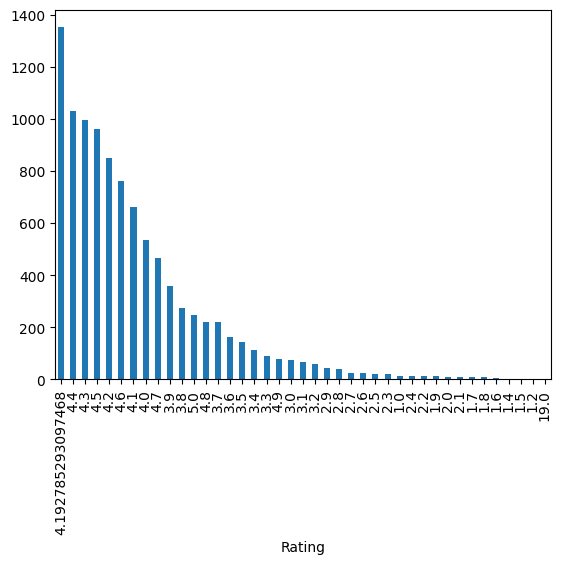

In [40]:
df['Rating'].value_counts().plot(kind="bar")

#If you get an error, you may be missing the matplotlib library
#(e.g. if you use miniconda instead of conda, matplotlib is not installed by default)
#!conda install -y matplotlib

From this visualization, we can assume the actual range of values for ```Rating``` is probably between 0 (or 1) and 5. The value 19 is probably a typo and should have been 1.9. We could remove it for now.

In [41]:
df.drop(df.loc[df['Rating'] == 19.000000].index, inplace=True) 

<Axes: xlabel='Rating'>

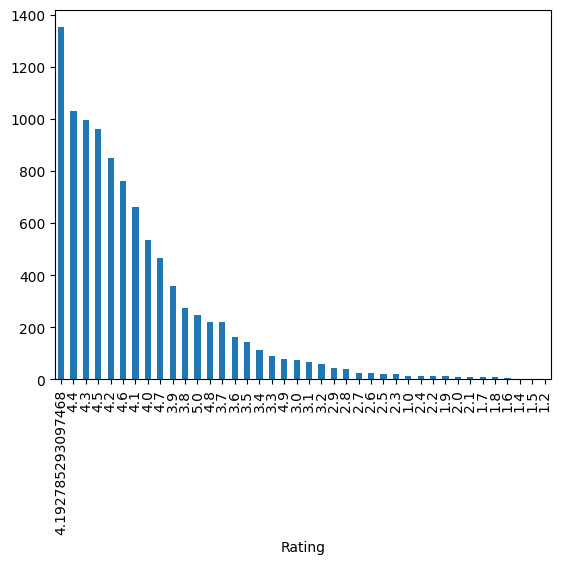

In [42]:
df["Rating"].value_counts().plot(kind="bar")

Now we would want to look into the apps with the highest rating, those were the rating is higher than 4.

In [43]:
df_high_rating = df[(df['Rating'] > 4)]
# df.shape --> (1000,14) 1000 rows and 14 cols
# shape[0] --> rows
# shape[1] --> cols

print(df_high_rating.shape[0]) # print number of rows
df_high_rating.head()

7622


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_cleaned,Size_cleaned
1,10823,List iptv FR,VIDEO_PLAYERS,4.192785,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up,100.0,2.9
5,751,CppDroid - C/C++ IDE,EDUCATION,4.100000,29980,Varies with device,"1,000,000+",Free,0,Everyone,Education,"August 17, 2017",Varies with device,Varies with device,1000000.0,13.0
6,4228,I Screen Dialer,TOOLS,4.100000,8137,3.9M,"1,000,000+",Free,0,Everyone,Tools,"February 25, 2018",1.11,4.3 and up,1000000.0,3.9
7,10310,Deposit Calculator FD & RD,FINANCE,4.400000,18,3.4M,"10,000+",Free,0,Everyone,Finance,"January 21, 2017",1.1,3.0 and up,10000.0,3.4
8,9712,EP Research Service,BOOKS_AND_REFERENCE,4.700000,14,27M,"1,000+",Free,0,Everyone,Books & Reference,"March 5, 2018",1.9,4.1 and up,1000.0,27.0


You could achieve the same using the ```query``` method, although the syntax is a bit different (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

In [44]:
df.query('Rating > 4 and Rating <= 5')

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_cleaned,Size_cleaned
1,10823,List iptv FR,VIDEO_PLAYERS,4.192785,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up,100.0,2.9
5,751,CppDroid - C/C++ IDE,EDUCATION,4.100000,29980,Varies with device,"1,000,000+",Free,0,Everyone,Education,"August 17, 2017",Varies with device,Varies with device,1000000.0,13.0
6,4228,I Screen Dialer,TOOLS,4.100000,8137,3.9M,"1,000,000+",Free,0,Everyone,Tools,"February 25, 2018",1.11,4.3 and up,1000000.0,3.9
7,10310,Deposit Calculator FD & RD,FINANCE,4.400000,18,3.4M,"10,000+",Free,0,Everyone,Finance,"January 21, 2017",1.1,3.0 and up,10000.0,3.4
8,9712,EP Research Service,BOOKS_AND_REFERENCE,4.700000,14,27M,"1,000+",Free,0,Everyone,Books & Reference,"March 5, 2018",1.9,4.1 and up,1000.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,346,imo beta free calls and text,COMMUNICATION,4.300000,659395,11M,"100,000,000+",Free,0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up,100000000.0,11.0
9994,5310,Kymco AK 550,AUTO_AND_VEHICLES,4.300000,47,58M,"1,000+",Free,0,Everyone,Auto & Vehicles,"November 11, 2016",1.0,2.3 and up,1000.0,58.0
9996,9356,Dance Magic Fashion Style Games,FAMILY,4.600000,2533,46M,"100,000+",Free,0,Everyone,Simulation,"February 27, 2018",1.0,4.0 and up,100000.0,46.0
9997,6885,Smashy Road: Arena,GAME,4.300000,45558,53M,"5,000,000+",Free,0,Everyone 10+,Action,"May 24, 2018",1.1.9,4.1 and up,5000000.0,53.0


We've already covered in the first notebook some ways of displaying particular columns, for instance, if you want to App column and the Rating column only, you could use:

In [45]:
df.loc[:,["App","Rating"]]

,App,Rating
0,Asahi Shimbun Digital,3.100000
1,List iptv FR,4.192785
2,Ultimate F1 Racing Championship,3.800000
3,CMB Free Dating App,4.000000
4,DW Spectrum™ IP VMS,3.400000
...,...,...
9995,Shop 'n Save,3.400000
9996,Dance Magic Fashion Style Games,4.600000
9997,Smashy Road: Arena,4.300000
9998,AP Math & Computer Science,3.700000


In [46]:
df.iloc[:,[1,3]]

,App,Rating
0,Asahi Shimbun Digital,3.100000
1,List iptv FR,4.192785
2,Ultimate F1 Racing Championship,3.800000
3,CMB Free Dating App,4.000000
4,DW Spectrum™ IP VMS,3.400000
...,...,...
9995,Shop 'n Save,3.400000
9996,Dance Magic Fashion Style Games,4.600000
9997,Smashy Road: Arena,4.300000
9998,AP Math & Computer Science,3.700000


Alternatively, you could use:

In [47]:
df[['App','Rating']] #double brackets because I give a list of column names

,App,Rating
0,Asahi Shimbun Digital,3.100000
1,List iptv FR,4.192785
2,Ultimate F1 Racing Championship,3.800000
3,CMB Free Dating App,4.000000
4,DW Spectrum™ IP VMS,3.400000
...,...,...
9995,Shop 'n Save,3.400000
9996,Dance Magic Fashion Style Games,4.600000
9997,Smashy Road: Arena,4.300000
9998,AP Math & Computer Science,3.700000


Typically, when we talk about subsetting the rows of a DataFrame, it is common to talk about 'filtering' rows of data based on a specific condition (like we did in the previous examples). For instance, you want to filter out the rows where the number of *installs* is higher than some specified value. We have covered how you can do that using the query methods or simply by verifying a condition for a specific column and creating a new dataframe.

There is also a ```filter``` method, however, this method can not filter the rows based on the contents of the DataFrame. You can't use the filter method to conditionally subset on the contents. It does allow you to select columns from a DataFrame. So yet another way of displaying the App and Installs columns:

In [48]:
df.filter(['App','Installs']) #this is absolute alternative to: df[['App','Rating']]

,App,Installs
0,Asahi Shimbun Digital,"500,000+"
1,List iptv FR,100+
2,Ultimate F1 Racing Championship,"100,000+"
3,CMB Free Dating App,"1,000,000+"
4,DW Spectrum™ IP VMS,"10,000+"
...,...,...
9995,Shop 'n Save,"100,000+"
9996,Dance Magic Fashion Style Games,"100,000+"
9997,Smashy Road: Arena,"5,000,000+"
9998,AP Math & Computer Science,"5,000+"


### FA-4

Show the Apps with a rating equal or bigger than 1 and smaller than 2. Display the first 10 of those apps. How many are there in total?

In [49]:
##### FA-4 ##############################
# df.loc[(df['Rating']>=1) & (df['Rating']<2)].head(10) #one option
print(df.query("Rating >= 1 and Rating  < 2").head(10)) #another option easier

# how many rows it filtered
print("The number of row it filtered out",len(df.query("Rating >= 1 and Rating  < 2")))
#########################################

      Unnamed: 0                            App      Category  Rating Reviews  \
176         8857                       DT Smart         TOOLS     1.6      39   
604         4995              ESS Mobile for AE  PRODUCTIVITY     1.9      63   
759         8875                 DT future1 cam         TOOLS     1.0       1   
985         5978  Truck Driving Test Class 3 BC        FAMILY     1.0       1   
1196         554  Just She - Top Lesbian Dating        DATING     1.9     953   
1228         625        House party - live chat        DATING     1.0       1   
1267         663  Just She - Top Lesbian Dating        DATING     1.9     954   
1436       10562                    FK Atlantas        SPORTS     1.5       2   
1475        4127              Speech Therapy: F        FAMILY     1.0       1   
1974        7677             Hercules CP Mobile         TOOLS     1.4      20   

      Size  Installs  Type  Price Content Rating        Genres  \
176   8.9M    1,000+  Free      0       Ev

### 3.2 Sort

For sorting, the following functions can be used.

* __df.sort_values(col1)__ - Sorts values by col1 in ascending order
* __df.sort_values(col2,ascending=False)__ - Sorts values by col2 in descending order
* __df.sort_values([col1,col2],ascending=[True,False])__ - Sorts values by col1 in ascending order then col2 in descending order

In [51]:
df.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_cleaned,Size_cleaned
0,3741,Asahi Shimbun Digital,NEWS_AND_MAGAZINES,3.100000,735,6.3M,"500,000+",Free,0,Everyone,News & Magazines,"July 25, 2018",6.3.0,4.0.3 and up,500000.0,6.3
1,10823,List iptv FR,VIDEO_PLAYERS,4.192785,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up,100.0,2.9


In [56]:
# df.sort_values("Rating")
# df.sort_values("Rating",ascending = False)
# df.sort_values(["Rating","Reviews"],ascending=[False,True])


### 3.3 Group by
One of the most powerful features in pandas is the ability to group dataframes by specific values and then perform calculations on those groups. 

* __df.groupby(col)__ - Returns a groupby object for values from one column
* __df.groupby([col1,col2])__ - Returns a groupby object values from multiple columns
* __df.groupby(col1)[col2].mean()__ - (Aggregation) Returns the mean of the values in col2, grouped by the values in col1 
* __df.pivot_table(index=col1,values=[col2,col3],aggfunc=mean)__ - Creates a pivot table that groups by col1 and calculates the mean of col2 and col3

Let's first create an example that makes it easier to illustrate/visualize what ```group by``` does.

In [69]:
#these two return the object info message not a table
#df.groupby(col) - Returns a groupby object for values from one column
#df.groupby([col1,col2]) - Returns a groupby object values from multiple columns


# df.groupby("Category")[["Rating", "Installs_cleaned"]].mean()

#  just learn this below instead of: df.groupby(col1)[col2].mean() - (Aggregation) Returns the mean of the values in col2, grouped by the values in col1
# df.groupby("Category").agg({
#     "Rating": "sum",
#     "Installs_cleaned": "mean" ->use this line only in case i need two diff funcs on different columns
# })

In [70]:
import numpy 

df2 = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                              'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three', 
                              'two', 'two', 'one', 'three'],
                       'C' : numpy.random.randn(8), #random nums with floating points that also can be + or -; random.randint needs a range
                       'D' : numpy.random.randn(8)})
df2

,A,B,C,D
0,foo,one,0.492611,0.929036
1,bar,one,0.217047,0.768541
2,foo,two,1.047418,-0.913562
3,bar,three,-2.549431,0.108492
4,foo,two,0.355212,-0.470535
5,bar,two,0.294332,-1.060982
6,foo,one,-0.408982,0.324116
7,foo,three,-0.147944,2.102853


`foo` and `bar` are the only values that appear in column A. If we would like to get a summary specifically for those values of column A, we could `groupby` column A.

In [72]:
# group by a single column
df2.groupby('A').describe() #incl only numeric columns so excluding column B

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   3.0 -0.679351  1.619998 -2.549431 -1.166192  0.217047  0.255689   
foo   5.0  0.267663  0.569399 -0.408982 -0.147944  0.355212  0.492611   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  0.294332   3.0 -0.061316  0.926506 -1.060982 -0.476245  0.108492   
foo  1.047418   5.0  0.394382  1.190427 -0.913562 -0.470535  0.324116   

                         
          75%       max  
A                        
bar  0.438516  0.768541  
foo  0.929036  2.102853

You can also group by more than one column, for instance column A and B.

In [73]:
# group by more than one column
df2.groupby(['A', 'B']).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  0.217047       NaN  0.217047  0.217047  0.217047  0.217047   
    three   1.0 -2.549431       NaN -2.549431 -2.549431 -2.549431 -2.549431   
    two     1.0  0.294332       NaN  0.294332  0.294332  0.294332  0.294332   
foo one     2.0  0.041815  0.637522 -0.408982 -0.183583  0.041815  0.267213   
    three   1.0 -0.147944       NaN -0.147944 -0.147944 -0.147944 -0.147944   
    two     2.0  0.701315  0.489464  0.355212  0.528263  0.701315  0.874366   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    0.217047   1.0  0.768541       NaN  0.768541  0.768541  0.768541   
    three -2.549431   1.0  0.108492       NaN  0.108492  0.108492  0.108492   
    two    0.294332   1.0 -1.060982       NaN -1.060982 -1.060982 -1.060982   
foo one    0.492611   2.0  0.626576  0.427743  0.324116  0.475346  0.626576   
    three -0.147944   1.0  2.102853       NaN  2.102853  2.102853  2.102853   
    two    1.047418   2.0 -0.692049  0.313267 -0.913562 -0.802805 -0.692049   

                               
                75%       max  
A   B                          
bar one    0.768541  0.768541  
    three  0.108492  0.108492  
    two   -1.060982 -1.060982  
foo one    0.777806  0.929036  
    three  2.102853  2.102853  
    two   -0.581292 -0.470535

Note that by default, ```groupby``` sorts the groups either alphabetically or numerically. You can change this using the ```sort``` parameter which is set to ```True``` by default.

In [79]:
numeric_cols = df2.select_dtypes(include='number').columns #select only the types that are numbers and get the columns
numeric_cols

Index(['C', 'D'], dtype='object')

In [83]:
# by default, groupby sorts the groups (alphabetically or numerically)

# print(df2.groupby('B')[numeric_cols].mean())
# print()
# print(df2.groupby('B', sort=False)[numeric_cols].mean())


#these lines below are the same as the code above
#sort is to sort alphabetically col B so sort=False means dont sort col B
df2.groupby('B', sort=False).agg({
    'C': 'mean',
    'D': 'mean'
})

,C,D
B,,
one,0.100226,0.673898
two,0.565654,-0.815026
three,-1.348687,1.105672


A specific group can be accessed using ```get_group()```:

In [84]:
# can access a single group
print(df2.groupby('A').get_group('bar')) #visualizing the inf we dont group it so B col can be presented too

     A      B         C         D
1  bar    one  0.217047  0.768541
3  bar  three -2.549431  0.108492
5  bar    two  0.294332 -1.060982


### FA-5

Return the mean of the values column C, grouped by the values in B.

In [92]:
##### FA-5 ##############################
# df2.groupby('B')['C'].mean()

#this works the same way
df2.groupby('B', sort=True).agg({
    'C': 'mean'
})

#########################################

,C
B,
one,0.100226
three,-1.348687
two,0.565654


### FA-6

Use the googleplaystore dataset and calculate the mean of the rating per genre.

In [95]:
##### FA-6 ##############################

# df.groupby('Genres')['Rating'].mean()

# per genre- means to group By genre
df.groupby('Genres').agg({
    'Rating':'mean'
})

#########################################

,Rating
Genres,
Action,4.278000
Action;Action & Adventure,4.300000
Adventure,4.192206
Adventure;Action & Adventure,4.416667
Adventure;Brain Games,4.600000
...,...
Video Players & Editors,4.048095
Video Players & Editors;Creativity,4.100000
Video Players & Editors;Music & Video,4.000000


### 3.4 Aggregating
Aggregation changes the number of rows or indices within the dataframe. We already saw some ways to aggregate a group: ```describe()```, ```head()```, ```tail()```, ```mean()```... For your information, there are many, many others, here are some examples of some of the frequently used ones:

- count
- head
- max
- mean
- median
- min
- std
- sum
- all
- any
- count
- describe
- fillna
- idxmax
- idxmin
- size
- nlargest
- nsmallest
- value_counts

## 4 Joining & Merging

We can Join or Merge two data frames in pandas python by using the ```append```, ```concat``` or ```merge``` function.

### 4.1 Joining & Merging
* __df1.append(df2)__ - Adds the rows in df1 to the end of df2 (columns should be identical)
* __pd.concat([df1, df2], axis=1)__ - Adds the columns in df1 to the end of df2 (rows should be identical)


* __pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True)__ - where
    + left − A DataFrame object.
    + right − Another DataFrame object.
    + how − One of 'left', 'right', 'outer', 'inner'. Defaults to inner. Each method has been described below.
    + on − Columns (names) to join on. __Must be found in both__ the left and right DataFrame objects.
    + left_on − Columns from the left DataFrame to use as keys.
    + right_on − Columns from the right DataFrame to use as keys.
    + left_index − If True, use the index (row labels) from the left DataFrame as its join key(s). In case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.
    + right_index − Same usage as left_index for the right DataFrame.
    + sort − Sort the result DataFrame by the join keys in _lexicographical order_. Defaults to True, setting to False will improve the performance substantially in many cases.

Let's again construct our own example and look at the ``append``, ```concat``` and ```merge``` functions.

In [100]:
df1 = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayan'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})

df2 = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Brock', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})

Let's first look at ```append```. (Append is a specific case of concat (axis=0, join='outer') of concat)

In [101]:
# df1.append(df2) #merging by rows -> this gives me the following error:

# ---------------------------------------------------------------------------
# AttributeError                            Traceback (most recent call last)
# ~\AppData\Local\Temp\ipykernel_27892\3581677827.py in ?()
# ----> 1 df1.append(df2) #merging by rows

# C:\python3\lib\site-packages\pandas\core\generic.py in ?(self, name)
#    6295             and name not in self._accessors
#    6296             and self._info_axis._can_hold_identifiers_and_holds_name(name)
#    6297         ):
#    6298             return self[name]
# -> 6299         return object.__getattribute__(self, name)

# AttributeError: 'DataFrame' object has no attribute 'append'


#so i used the equivalent to df1.append(df2)
pd.concat([df1, df2], ignore_index=True)


,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayan,sub5
5,1,Billy,sub2
6,2,Brian,sub4
7,3,Brock,sub3
8,4,Bryce,sub6
9,5,Betty,sub5


Using concat will give the same results, it has however more options. You have for instance the flexibility to join based on the axis.

In [102]:
pd.concat([df1, df2], ignore_index = True) #default axis = 0, merging by rows

,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayan,sub5
5,1,Billy,sub2
6,2,Brian,sub4
7,3,Brock,sub3
8,4,Bryce,sub6
9,5,Betty,sub5


ignore_index : boolean, default False. If True, do not use the index values on the concatenation axis. The resulting axis will be labeled 0, …, n - 1. This is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information (like in this example). Note the index values on the other axes are still respected in the join.

In [103]:
pd.concat([df1, df2], axis=1) #default axis = 0, axis=1 means merging by columns

,id,Name,subject_id,id,Name,subject_id
0,1,Alex,sub1,1,Billy,sub2
1,2,Amy,sub2,2,Brian,sub4
2,3,Allen,sub4,3,Brock,sub3
3,4,Alice,sub6,4,Bryce,sub6
4,5,Ayan,sub5,5,Betty,sub5


Now, say you want to ``merge`` two dataframes by a specific key, for instance, the 'id' of a subject.

In [104]:
pd.merge(df1,df2, on='id')

,id,Name_x,subject_id_x,Name_y,subject_id_y
0,1,Alex,sub1,Billy,sub2
1,2,Amy,sub2,Brian,sub4
2,3,Allen,sub4,Brock,sub3
3,4,Alice,sub6,Bryce,sub6
4,5,Ayan,sub5,Betty,sub5


You can also merge on multiple keys:

In [106]:
pd.merge(df1,df2,on=['id','subject_id'])

,id,Name_x,subject_id,Name_y
0,4,Alice,sub6,Bryce
1,5,Ayan,sub5,Betty


### FA-7
When we used merge in the previous example, we were only left with two rows (Alice and Bryce could be merged on both id and subject_id, and Ayan and Betty too.) Look at the documentation and figure our why that is the case. Use the pandas documentation on ```merge``` and change the parameter responsible for the type of merge. This time merge by using all the rows (keys) from the first Dataframe (df1) and retrieve from the second dataframe only those that match. [*Hint: Have a look at the illustration below*]

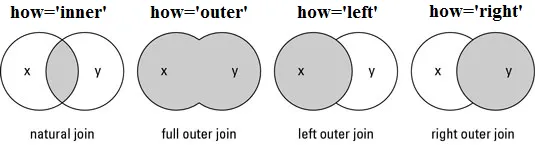

In [78]:
##### FA-7 ##############################

df4 = pd.merge(df1, df2, on=['id', 'subject_id'], how='left')
print(df4)
#########################################

   id Name_x subject_id Name_y
0   1   Alex       sub1    NaN
1   2    Amy       sub2    NaN
2   3  Allen       sub4    NaN
3   4  Alice       sub6  Bryce
4   5   Ayan       sub5  Betty


# References

* Drew Hendrickson and Eva van Massenhove: Materials for Advanced Data Procesing (2021)
* https://gist.github.com/Tamoghna-Saha/65212a01b3a3f0da06c3f77ee89c83d8#file-python-notebook-advanced-pandas-ipynb
* https://github.com/mkcor/advanced-pandas/tree/master/notebooks
* https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
* https://towardsdatascience.com/learn-advanced-features-for-pythons-main-data-analysis-library-in-20-minutes-d0eedd90d086
* https://medium.com/@janhavi.mohan/data-preprocessing-using-google-playstore-dataset-part-i-56d6bfc0671b